# Algoritmo A*


O Algoritmo A* é um algoritmo de busca heurística usado para encontrar o caminho mais curto entre dois pontos em um grafo ou espaço de estados(como mapas, jogos, quebra-cabeças etc).

Ele é amplamente usado porque consegue equilibrar velocidade com precisão, sendo mais inteligente que busca em largura ou profundidade.

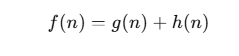




*   g(n) = custo real para chegar até o nó n a partir do início
*   h(n) = heurística, ou seja, uma estimativa do custo de n até o objetivo
*   f(n) = custo total estimado do caminho passando por n




#Vantagens


*   Completo: encontra solução se ela existir
*   Ótimo: encontra a melhor solução (se h for admissível)
*   Eficiente: evita explorar caminhos muito ruins

# Obs:

*   Para o A* funcionar bem, a heurística h(n) precisa ser:

*  Admissível: nunca superestima o custo real
*  Consistente (preferencialmente): segue o princípio do triângulo















In [ ]:
#Autor: Eduardo Filho
#UFPB 2025
#Introdução a IA

import heapq  # Usado para a fila de prioridade (min-heap)

# Heurística: distância em linha reta até Craiova
heuristic_to_craiova = {
    'Arad': 366,
    'Zerind': 374,
    'Oradea': 380,
    'Sibiu': 253,
    'Timisoara': 329,
    'Lugoj': 244,
    'Mehadia': 241,
    'Drobeta': 242,
    'Craiova': 0,
    'Rimnicu Vilcea': 160,
    'Pitesti': 100,
    'Fagaras': 176,
    'Bucharest': 160,
    'Giurgiu': 176,
    'Urziceni': 193,
    'Hirsova': 244,
    'Eforie': 265,
    'Vaslui': 270,
    'Iasi': 320,
    'Neamt': 350
}

# Mapa com custos reais de viagem entre cidades
romania_map = {
    'Arad': {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118},
    'Zerind': {'Arad': 75, 'Oradea': 71},
    'Oradea': {'Zerind': 71, 'Sibiu': 151},
    'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu Vilcea': 80},
    'Timisoara': {'Arad': 118, 'Lugoj': 111},
    'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
    'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
    'Drobeta': {'Mehadia': 75, 'Craiova': 120},
    'Craiova': {'Drobeta': 120, 'Pitesti': 138, 'Rimnicu Vilcea': 146},
    'Rimnicu Vilcea': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
    'Pitesti': {'Rimnicu Vilcea': 97, 'Craiova': 138, 'Bucharest': 101},
    'Bucharest': {'Fagaras': 211, 'Pitesti': 101}
}

def a_star_search(start, goal, graph, heuristic):
    # Fila de prioridade armazenando tuplas (f(n), g(n), cidade atual, caminho)
    frontier = []
    heapq.heappush(frontier, (heuristic[start], 0, start, [start]))

    while frontier:
        f, g, current, path = heapq.heappop(frontier)
        print(f"\n  Visitando: {current}")
        print(f"   → Custo real g(n): {g}")
        print(f"   → Heurística h(n): {heuristic[current]}")
        print(f"   → Estimativa total f(n): {f}")
        print(f"   → Caminho até agora: {path}")

        if current == goal:
            print("\n✅ Caminho encontrado!")
            print(' -> '.join(path))
            print(f"Custo total da rota: {g}")
            return path

        # Expandir vizinhos
        for neighbor, cost in graph.get(current, {}).items():
            new_g = g + cost  # Custo acumulado
            new_f = new_g + heuristic[neighbor]  # f(n) = g(n) + h(n)
            heapq.heappush(frontier, (new_f, new_g, neighbor, path + [neighbor]))

    print("Nenhum caminho encontrado.")
    return None

# Chamada do algoritmo
a_star_search('Arad', 'Craiova', romania_map, heuristic_to_craiova)




  Visitando: Arad
   → Custo real g(n): 0
   → Heurística h(n): 366
   → Estimativa total f(n): 366
   → Caminho até agora: ['Arad']

  Visitando: Sibiu
   → Custo real g(n): 140
   → Heurística h(n): 253
   → Estimativa total f(n): 393
   → Caminho até agora: ['Arad', 'Sibiu']

  Visitando: Rimnicu Vilcea
   → Custo real g(n): 220
   → Heurística h(n): 160
   → Estimativa total f(n): 380
   → Caminho até agora: ['Arad', 'Sibiu', 'Rimnicu Vilcea']

  Visitando: Craiova
   → Custo real g(n): 366
   → Heurística h(n): 0
   → Estimativa total f(n): 366
   → Caminho até agora: ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Craiova']

✅ Caminho encontrado!
Arad -> Sibiu -> Rimnicu Vilcea -> Craiova
Custo total da rota: 366


['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Craiova']

# Saída esperada (Passo a Passo com explicações)



*  Etapa 1: Arad

g(Arad) = 0 (custo real)

h(Arad) = 366 (distância em linha reta até Craiova)

f(Arad) = 0 + 366 = 366

Expande para: Zerind, Sibiu, Timisoara






*   Etapa 2: Sibiu (melhor f = 393)

g(Sibiu) = 140 (Arad → Sibiu)

h(Sibiu) = 253

f(Sibiu) = 393

Expande para: Fagaras, Rimnicu Vilcea




*   Etapa 3: Rimnicu Vilcea

g = 140 (Arad → Sibiu) + 80 = 220

h = 160

f = 380

Expande para: Craiova, Pitesti




*  Etapa 4: Craiova

g = 220 (Arad → Sibiu → Rimnicu Vilcea) + 146 = 366

h = 0

f = 366




**Objetivo alcançado!**

Caminho: Arad → Sibiu → Rimnicu Vilcea → Craiova

Custo total: 366 km


